In [1]:
import sys
import os
sys.path.append("../..")

## Usage of the `TIMViz` module

Interactions are represented as rectangles along the genomic axis. The module is implemented here:

In [2]:
from diachr.TIMViz import TIMViz

For demonstration purposes, we have prepared an interaction file with 44 interactions:

In [3]:
INTERACTION_FILE = '../../tests/data/TIMViz_i_test_file.tsv'

In addition to the interactions, TAD regions can be displayed as gray triangles. We have prepared a test BED file with regions:

In [4]:
TAD_BED_FILE = '../../tests/data/TIMViz_t_test_file.bed'
#TAD_BED_FILE = None

Furthermore, fragments selected for enrichment can be marked with vertical and diagonal lines. We have prepared a test BED file containing five regions:

In [5]:
BAIT_BED_FILE = '../../tests/data/TIMViz_b_test_file.bed'
#BAIT_BED_FILE = None

A class `TIMViz` object is created by passing these files to the constructor:

In [6]:
visualizer = TIMViz(i_file=INTERACTION_FILE, t_file=TAD_BED_FILE, b_file=BAIT_BED_FILE, verbose=True)

[INFO] Initializing TIMviz object ...
	[INFO] Reading interactions and group them by chromosomes ...
		chr10: 44 interactions
	[INFO] ... done.
	[INFO] Reading TAD regions and group them by chromosomes ...
		chr10: 5 TADs
	[INFO] ... done.
	[INFO] Reading baited digest regions and group them by chromosomes ...
		chr10: 5 Baits
	[INFO] ... done.
[INFO] ... done.


After that, the method `TIMViz.create_visualization()` can be used to generate triangle interaction maps for selected regions. The only parameters required are the genomic coordinates.

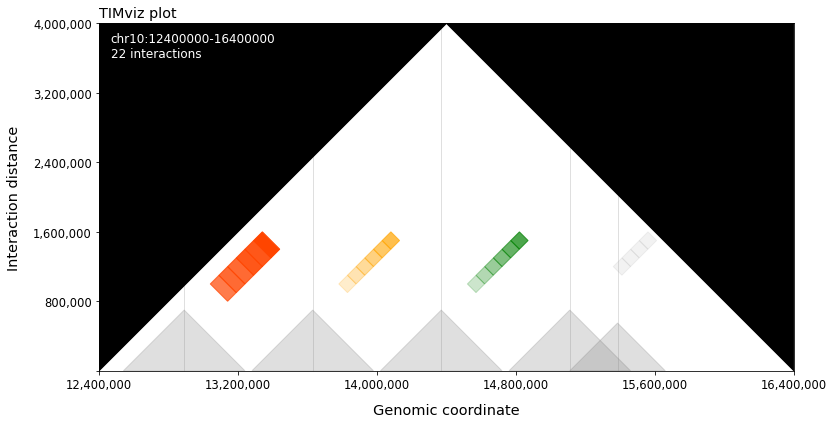

In [7]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    show_complete_annotations = False,
    verbose = False)

In principle, this plot corresponds to a typical representation of Hi-C interactions in triangle heatmaps. The genomic coordinates are plotted on the x-axis and each colored rectangle or square in the triangle above the region shown represents an interaction between two genomic regions. For Hi-C data, interactions are typically grouped in bins of the same size, so that all interacting bins are represented as squares. In the representation presented here, interactions are represented as rectangles whose edge lengths correspond to the lengths of the associated restriction fragments.

Interactions of different categories are shown in different colors (`DIX` in `orangered`, `DI` in `orange`, `UIR` in `green` and `UI` in `gray`). The transparency of the rectangles depends on how many reads an interaction has relative to all other interactions to be displayed within the range for which a map is generated. The TAD regions are shown as gray triangles. Restriction fragments that have been selected for enrichment (baited) are marked with vertical gray lines at the center of the fragment.

The interaction within the region to be visualized can be filtered based on their category. For instance, the following plot shows only `DI` and `UIR` interactions.

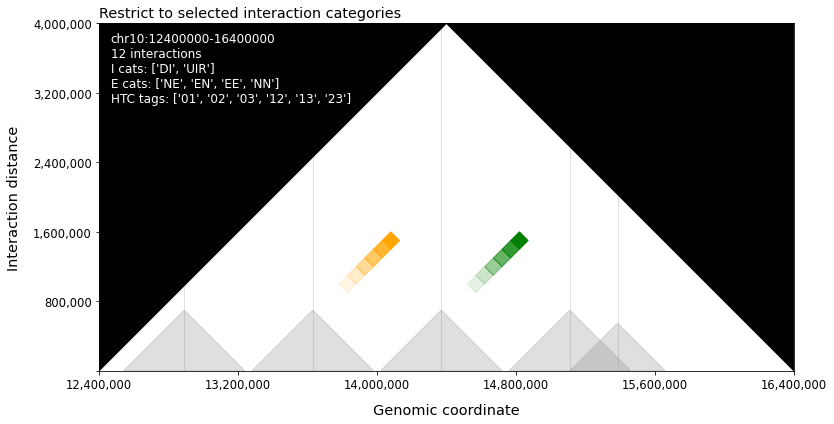

In [8]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    show_complete_annotations=True,
    plot_title = 'Restrict to selected interaction categories',
    verbose = False)

Previously, the interactions were assigned colors according to their categories. In the following plot, the interactions are colored according to their configuration. The color assignment for configurations is as follows:

* `01`: pink
* `02`: red
* `03`: lime
* `12`: magenta
* `13`: blue
* `23`: turquoise
* `0X`: lightsteelblue
* `1X`: lightsteelblue
* `2X`: lightsteelblue
* `3X`: lightsteelblue
* Balanced interactions: dimgray

Use `color_i_cats = False` to color interactions according to their configuration.

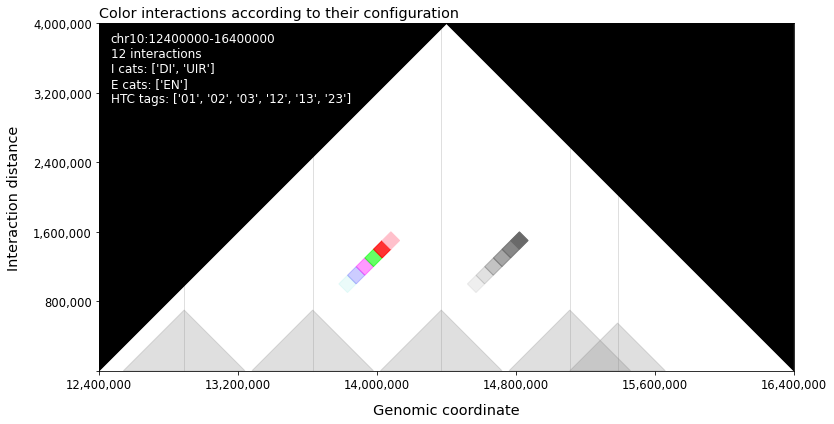

In [9]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    show_complete_annotations=True,
    color_i_cats = False,
    plot_title = 'Color interactions according to their configuration',
    verbose = False)

The interaction within the region to be visualized can be filtered based on their configuration. For instance, the following plot shows only interactions with the configurations `01` (pink), `02` (red) and `03` (lime).

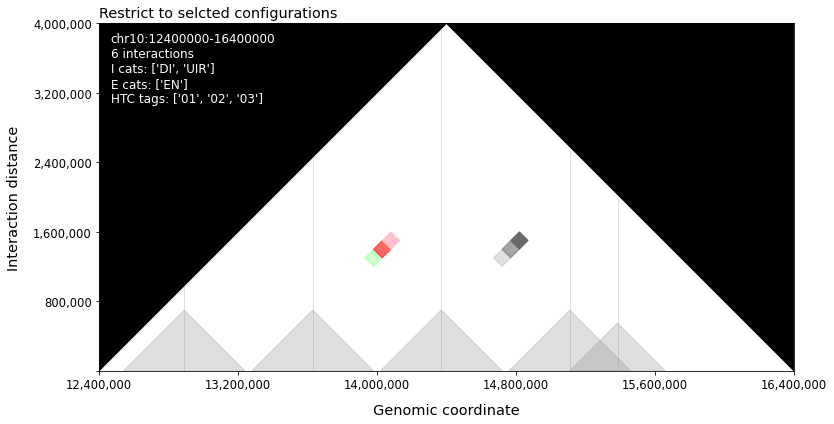

In [10]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    show_complete_annotations=True,
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    plot_title = 'Restrict to selcted configurations',
    verbose = False)

Baited fragments marked with vertical gray lines can be additionally highlighted with diagonal lines using `plot_bait_diagonals=True`.

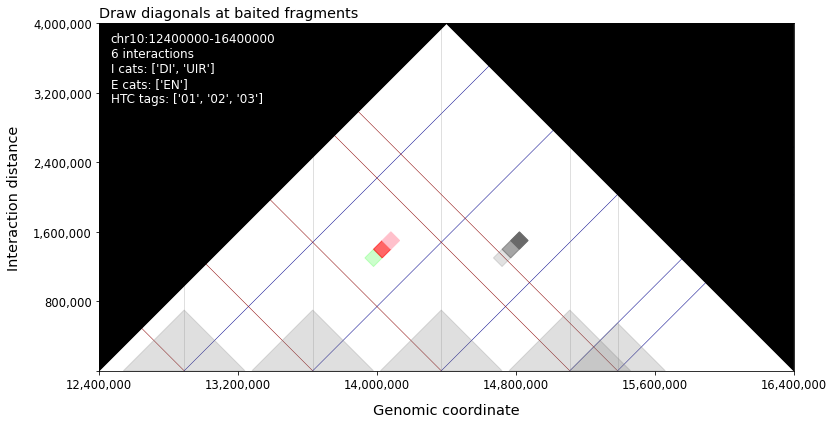

In [11]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    show_complete_annotations=True,
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    plot_bait_diagonals=True,
    plot_title = 'Draw diagonals at baited fragments',
    verbose = False)

By default, the method `PolygonPatch` automatically chooses a line width for the borders of polygons. Lines that are too thick lead to overlapping rectangles, which distorts the representation. The parameter `pp_linewidth` can be used to control the line width. A line width of `0` ensures that there are no overlaps.

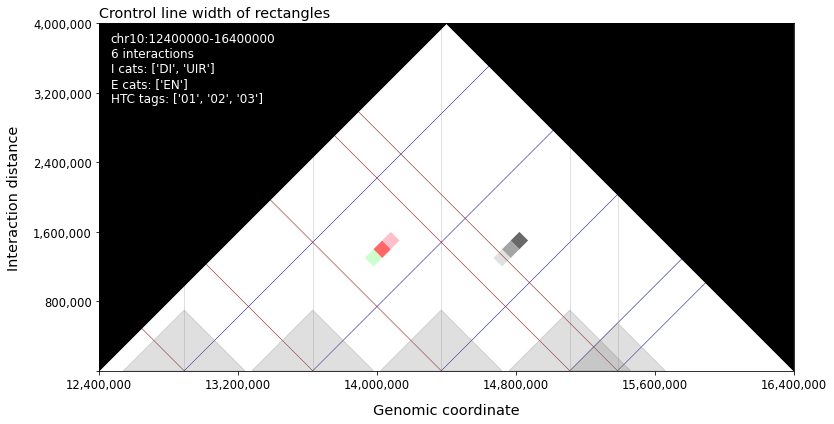

In [12]:
chrom = 'chr10'
begin = 12400000
end = begin + 4000000
TadViz_plot = visualizer.create_visualization(
    chrom = chrom,
    begin = begin,
    end = end,
    inter_cat_list = ['DI','UIR'],
    enr_cat_list = ['EN'],
    color_i_cats = False,
    ht_tag_list = ['01','02','03'],
    show_complete_annotations=True,
    plot_bait_diagonals=True,
    pp_linewidth=0,
    plot_title = 'Crontrol line width of rectangles',
    verbose = False)